In [1]:
import math
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

import scipy
import scipy.optimize as sopt
from scipy.special import gamma, factorial
from sympy import *
from scipy import interpolate
from scipy.interpolate import interp1d, BarycentricInterpolator, CubicSpline, PchipInterpolator


# **6.3**

## (a)

In [2]:
# function for math function
def derive_seta(n=50, a=0, b=3):
  # step size and list declarations 
  step_size = (b - a) / n
  x_list = list()
  y_list = list()

  # loop through each step in the domain
  for i in range(n):
    # calculate the current position and its function value 
    temp_x = a + i*step_size
    temp_y = temp_x**4 - 14*temp_x**3 + 60*temp_x**2 - 70*temp_x
    # append current x and y to their lists 
    x_list.append(temp_x)
    y_list.append(temp_y)

  # determine the minimum y value
  min_value = min(y_list)
  print("The minimum of this function is", min_value)

  # plot the function
  plt.plot(x_list, y_list)
  print("Since the function only has one local minima on the closed interval [0, 3], it is unimodal")

The minimum of this function is -24.369577439999997
Since the function only has one local minima on the closed interval [0, 3], it is unimodal


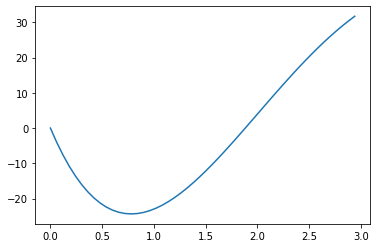

In [3]:
derive_seta()

## (b)

In [4]:
# function for math function
def derive_setb(n=50, a=0, b=3):
  # step size and list declarations 
  step_size = (b - a) / n
  x_list = list()
  y_list = list()

  # loop through each step in the domain
  for i in range(n):
    # calculate the current position and its function value 
    temp_x = a + i*step_size
    temp_y = 0.5*temp_x**2 - math.sin(temp_x)
    # append current x and y to their lists 
    x_list.append(temp_x)
    y_list.append(temp_y)

  # determine the minimum y value
  min_value = min(y_list)
  print("The minimum of this function is", min_value)

  # plot the function
  plt.plot(x_list, y_list)
  print("Since the function only has one local minima on the closed interval [0, 3], it is unimodal")

In [5]:
derive_setb()

The minimum of this function is -0.4001846719714731
Since the function only has one local minima on the closed interval [0, 3], it is unimodal


## (c)

In [6]:
# function for math function
def derive_setc(n=50, a=0, b=3):
  # step size and list declarations 
  step_size = (b - a) / n
  x_list = list()
  y_list = list()

  # loop through each step in the domain
  for i in range(n):
    # calculate the current position and its function value 
    temp_x = a + i*step_size
    temp_y = temp_x**2 + 4*math.cos(temp_x)
    # append current x and y to their lists 
    x_list.append(temp_x)
    y_list.append(temp_y)

  # determine the minimum y value
  min_value = min(y_list)
  print("The minimum of this function is", min_value)

  # plot the function
  plt.plot(x_list, y_list)
  print("Since the function only has one local minima on the closed interval [0, 3], it is unimodal")

The minimum of this function is 2.3178013953964074
Since the function only has one local minima on the closed interval [0, 3], it is unimodal


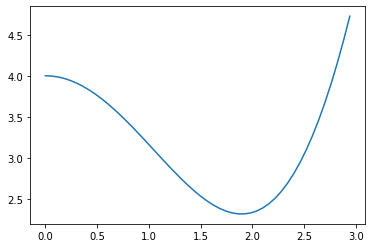

In [7]:
derive_setc()

## (d)

In [37]:
# function for math function
def derive_setd(n=50, a=0, b=3):
  # step size and list declarations 
  step_size = (b - a) / n
  x_list = list()
  y_list = list()

  # loop through each step in the domain
  for i in range(n):
    # calculate the current position and its function value 
    temp_x = a + i*step_size
    temp_y = scipy.special.gamma(temp_x)
    # append current x and y to their lists 
    x_list.append(temp_x)
    y_list.append(temp_y)

  # determine the minimum y value
  min_value = min(y_list)
  print("The minimum of this function is", min_value)

  # plot the function
  plt.plot(x_list, y_list)
  print("Since the function only has one local minima on the closed interval [0, 3], it is unimodal")

In [38]:
derive_setd()

The minimum of this function is 0.8858050634480914
Since the function only has one local minima on the closed interval [0, 3], it is unimodal


# **6.7**

## (c)

In [39]:
# definition of function
def f(xy):
    x = xy[0]
    y = xy[1]
    val = 2.0*x**3 - 3.0*x**2 - 6.0*y*x**2 + 6.0*x*y**2 + 6.0*x*y
    return val

# definition of derivative
def df(xy):
    x = xy[0]
    y = xy[1]
    val1 = 6.0*x**2 - 6.0*x - 12.0*y*x + 6.0*y**2 + 6.0*y
    val2 = -6.0*x**2 + 12.0*x*y + 6.0*x
    return np.array([val1, val2])

# function to find the minima
def find_minima(starting_point, f, df):
  # initialize threshold, learning rate, and initial guess
  threshold = np.array([1e-8, 1e-8])
  lr = 0.001
  loop_cnt = 0
  max_loops = 1000
  guesses = [starting_point]

  # loop until convergence is found
  while True:
    # grab the initial guess
    x = guesses[-1]

    # solve for the new gradient and append it to the list 
    s = x - lr*df(x)
    guesses.append(s)

    # break if the guesses are the same
    if np.all((guesses[-1] - guesses[-2]) < threshold):
      break

    # break if infinitly looping
    loop_cnt+=1
    if loop_cnt > max_loops:
      break

  # print the minima
  min_point = guesses[-1]
  min_val = f(min_point)

  if loop_cnt > max_loops and min_val < 0:
    print("The minimum starting at point [", starting_point[0], ",", starting_point[1], "] is -inf")
  elif loop_cnt > max_loops and min_val > 0:
    print("The minimum starting at point [", starting_point[0], ",", starting_point[1], "] is +inf")
  else:
    print("The minimum starting at point [", starting_point[0], ",", starting_point[1], "] is", min_val)



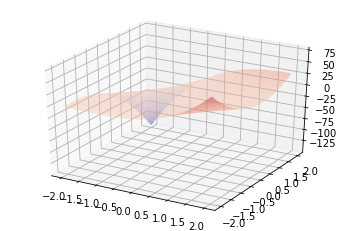

In [40]:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.4, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True, zorder = 0.5)


## (d)

In [41]:
# define starting points
starting_point_1 = np.array([1, 1])
starting_point_2 = np.array([-1, 1])
starting_point_3 = np.array([1, -1])
starting_point_4 = np.array([-1, -1])
starting_point_5 = np.array([0, 0])
starting_point_6 = np.array([1, 0])
starting_point_7 = np.array([-1, 0])
starting_point_8 = np.array([0, 1])
starting_point_9 = np.array([0, -1])

# find the minima from each starting point
find_minima(starting_point_1, f, df)
find_minima(starting_point_2, f, df)
find_minima(starting_point_3, f, df)
find_minima(starting_point_4, f, df)
find_minima(starting_point_5, f, df)
find_minima(starting_point_6, f, df)
find_minima(starting_point_7, f, df)
find_minima(starting_point_8, f, df)
find_minima(starting_point_9, f, df)


The minimum starting at point [ 1 , 1 ] is 4.856864
The minimum starting at point [ -1 , 1 ] is -inf
The minimum starting at point [ 1 , -1 ] is -inf
The minimum starting at point [ -1 , -1 ] is 1.0
The minimum starting at point [ 0 , 0 ] is 0.0
The minimum starting at point [ 1 , 0 ] is -1.0
The minimum starting at point [ -1 , 0 ] is -inf
The minimum starting at point [ 0 , 1 ] is -0.14529945600000002
The minimum starting at point [ 0 , -1 ] is 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less


# **6.9**

## (a) Steepest Descent

In [13]:
# definition of Rosenbrock’s function
def f(xy):
    x = xy[0]
    y = xy[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df(xy):
    x = xy[0]
    y = xy[1]
    val1 = -400.0 * x * (y - x**2) - 2 * (1 - x)
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

In [14]:
# initialize threshold, learning rate, and initial guess
threshold_sd_1 = np.array([1e-8, 1e-8])
lr_sd_1 = 0.0001
guesses_sd_1 = [np.array([-1, 1])]

# loop until convergence is found
while True:
  # grab the initial guess
  x_sd_1 = guesses_sd_1[-1]

  # solve for the new gradient and append it to the list 
  s_sd_1 = x_sd_1 - lr_sd_1*df(x_sd_1)
  guesses_sd_1.append(s_sd_1)

  # break if the guesses are the same
  if np.all((guesses_sd_1[-1] - guesses_sd_1[-2]) < threshold_sd_1):
    break

# plot the path 
X_sd_1 = [guess[0] for guess in guesses_sd_1]
Y_sd_1 = [guess[1] for guess in guesses_sd_1]
Z_sd_1 = [f(guess) for guess in guesses_sd_1]
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X_sd_1, Y_sd_1, Z_sd_1)

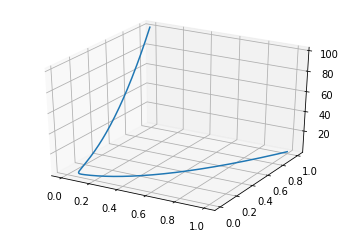

In [15]:
# initialize threshold, learning rate, and initial guess
threshold_sd_2 = np.array([1e-8, 1e-8])
lr_sd_2 = 0.0001
guesses_sd_2 = [np.array([0, 1])]

# loop until convergence is found
while True:
  # grab the initial guess
  x_sd_2 = guesses_sd_2[-1]

  # solve for the new gradient and append it to the list 
  s_sd_2 = x_sd_2 - lr_sd_2*df(x_sd_2)
  guesses_sd_2.append(s_sd_2)

  # break if the guesses are the same
  if np.all((guesses_sd_2[-1] - guesses_sd_2[-2]) < threshold_sd_2):
    break

# plot the path 
X_sd_2 = [guess[0] for guess in guesses_sd_2]
Y_sd_2 = [guess[1] for guess in guesses_sd_2]
Z_sd_2 = [f(guess) for guess in guesses_sd_2]
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X_sd_2, Y_sd_2, Z_sd_2)

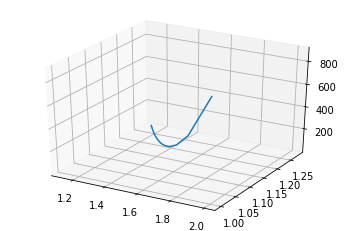

In [16]:
# initialize threshold, learning rate, and initial guess
threshold_sd_3 = np.array([1e-8, 1e-8])
lr_sd_3 = 0.0001
guesses_sd_3 = [np.array([2, 1])]

# loop until convergence is found
while True:
  # grab the initial guess
  x_sd_3 = guesses_sd_3[-1]

  # solve for the new gradient and append it to the list 
  s_sd_3 = x_sd_3 - lr_sd_3*df(x_sd_3)
  guesses_sd_3.append(s_sd_3)

  # break if the guesses are the same
  if np.all((guesses_sd_3[-1] - guesses_sd_3[-2]) < threshold_sd_3):
    break

# plot the path 
X_sd_3 = [guess[0] for guess in guesses_sd_3]
Y_sd_3 = [guess[1] for guess in guesses_sd_3]
Z_sd_3 = [f(guess) for guess in guesses_sd_3]
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X_sd_3, Y_sd_3, Z_sd_3)

## (b) Newton's Method

In [17]:
# definition of Rosenbrock’s function
def f(xy):
    x = xy[0]
    y = xy[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df(xy):
    x = xy[0]
    y = xy[1]
    val1 = 400.0 * (y - x**2) * x - 2 * x
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

def ddf(xy):
    x = xy[0]
    y = xy[1]
    val11 = 400.0 * (y - x**2) - 800.0 * x**2 - 2
    val12 = 400.0
    val21 = -400.0 * x
    val22 = 200.0
    return np.array([[val11, val12], [val21, val22]])

In [18]:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.4, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True, zorder = 0.5)


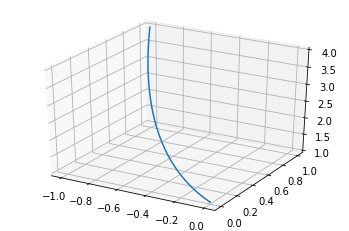

In [19]:
# initialize threshold and initial guess
threshold_new_1 = np.array([1e-8, 1e-8])
guesses_new_1 = [np.array([-1, 1])]

# loop until convergence is found
while True:
  # grab the initial guess
  x_new_1 = guesses_new_1[-1]

  # solve for the new gradient and append it to the list 
  s_new_1 = la.solve(ddf(x_new_1), df(x_new_1))
  next_guess_new_1 = x_new_1 - s_new_1
  guesses_new_1.append(next_guess_new_1)

  # break if the guesses are the same
  if np.all((guesses_new_1[-1] - guesses_new_1[-2]) < threshold_new_1):
    break

# plot the path 
X_new_1 = [guess[0] for guess in guesses_new_1]
Y_new_1 = [guess[1] for guess in guesses_new_1]
Z_new_1 = [f(guess) for guess in guesses_new_1]
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X_new_1, Y_new_1, Z_new_1)


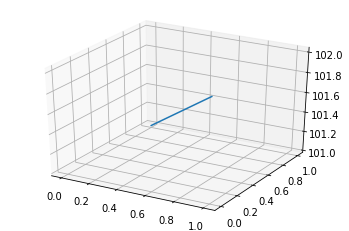

In [20]:
# initialize threshold and initial guess
threshold_new_2 = np.array([1e-8, 1e-8])
guesses_new_2 = [np.array([0, 1])]

# loop until convergence is found
while True:
  # grab the initial guess
  x_new_2 = guesses_new_2[-1]

  # solve for the new gradient and append it to the list 
  s_new_2 = la.solve(ddf(x_new_2), df(x_new_2))
  next_guess_new_2 = x_new_2 - s_new_2
  guesses_new_2.append(next_guess_new_2)

  # break if the guesses are the same
  if np.all((guesses_new_2[-2] - guesses_new_2[-2]) < threshold_new_2):
    break

# plot the path 
X_new_2 = [guess[0] for guess in guesses_new_2]
Y_new_2 = [guess[1] for guess in guesses_new_2]
Z_new_2 = [f(guess) for guess in guesses_new_2]
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X_new_2, Y_new_2, Z_new_2)


In [21]:
# initialize threshold and initial guess
threshold_new_3 = np.array([1e-8, 1e-8])
guesses_new_3 = [np.array([2, 1])]

# loop until convergence is found
while True:
  # grab the initial guess
  x_new_3 = guesses_new_3[-1]

  # solve for the new gradient and append it to the list 
  s_new_3 = la.solve(ddf(x_new_3), df(x_new_3))
  next_guess_new_3 = x_new_3 - s_new_3
  guesses_new_3.append(next_guess_new_3)

  # break if the guesses are the same
  if np.all((guesses_new_3[-1] - guesses_new_3[-2]) < threshold_new_3):
    break

# plot the path 
X_new_3 = [guess[0] for guess in guesses_new_3]
Y_new_3 = [guess[1] for guess in guesses_new_3]
Z_new_3 = [f(guess) for guess in guesses_new_3]
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X_new_3, Y_new_3, Z_new_3)


# **7.4**

In [22]:
# define data for 11/21 equally spaced regions 
x_11 = np.linspace(-1, 1, num=12, endpoint=True)
y_11 = 1 / (1 + 25*x_11**2)
x_21 = np.linspace(-1, 1, num=22, endpoint=True)
y_21 = 1 / (1 + 25*x_21**2)

# define new domain to plot on
new_domain = np.linspace(-1, 1, num=100, endpoint=True)

# determine polynomial spline data for 11/21 equally spaced regions
ps_11 = interp1d(x_11, y_11, kind='slinear')
y_ps_11_new = ps_11(new_domain)
ps_21 = interp1d(x_21, y_21, kind='slinear')
y_ps_21_new = ps_21(new_domain)

# determine cubic spline data for 11/21 equally spaced regions
cs_11 = interp1d(x_11, y_11, kind='cubic')
y_cs_11_new = cs_11(new_domain)
cs_21 = interp1d(x_21, y_21, kind='cubic')
y_cs_21_new = cs_21(new_domain)

# true function values
true_x = np.linspace(-1, 1, num=10000, endpoint=True)
true_y = 1 / (1 + 25*true_x**2)

In [23]:
# plot the spline
plt.plot(x_11, y_11, 'o', new_domain, y_cs_11_new, '-', new_domain, y_ps_11_new, '-', true_x, true_y, '-')
plt.show()
print("As we can see from the graph above the red line, which represents")
print("the true function is most closely approximated by the cubic spline")
print("and the slinear/polynomial spline is below the cubic spline.")

As we can see from the graph above the red line, which represents
the true function is most closely approximated by the cubic spline
and the slinear/polynomial spline is below the cubic spline.


In [24]:
# plot the spline
plt.plot(x_11, y_11, 'o', new_domain, y_cs_21_new, '-', new_domain, y_ps_21_new, '-', true_x, true_y, '-')
plt.show()
print("As we can see from the graph above an increase in the number of")
print("regions increased the approximation of the interpolation methods.")
print("Although the cubic spline still interpolates better.")

As we can see from the graph above an increase in the number of
regions increased the approximation of the interpolation methods.
Although the cubic spline still interpolates better.


# **7.7**

In [25]:
# define data
x = [1, 2, 3, 4, 5]
y = [1, 1, 2, 6, 24]
new_domain = np.linspace(1, 5, num=100, endpoint=True)

# true function values
true_x = np.linspace(1, 5, num=10000, endpoint=True)
true_y = [gamma(x) for x in true_x]

## (a) Quadratic

In [26]:
# quadratic spline
qs = interp1d(x, y, kind='quadratic')
y_qs = qs(new_domain)

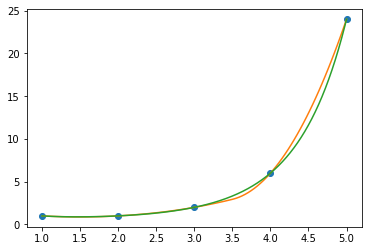

In [27]:
# plot the data
plt.plot(x, y, 'o', new_domain, y_qs, '-', true_x, true_y, '-')
plt.show()

## (b) Cubic

In [28]:
# quadratic spline
cs = interp1d(x, y, kind='cubic')
y_cs = cs(new_domain)

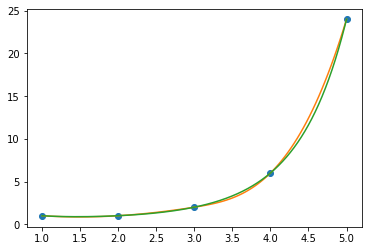

In [29]:
# plot the data
plt.plot(x, y, 'o', new_domain, y_cs, '-', true_x, true_y, '-')
plt.show()

## (c)

In [30]:
print("Based on both graphs above, I can accurately say that the cubic spline is more accurate overall.")

Based on both graphs above, I can accurately say that the cubic spline is more accurate overall.


## (d)

In [31]:
print("Based on both graphs above, it seems as though the quadratic spline is more accurate between 1 and 2.")

Based on both graphs above, it seems as though the quadratic spline is more accurate between 1 and 2.


# **8.18**

In [32]:
# define data
x = [0, 1, 2, 3, 4, 5]
y = [1.0, 2.7, 5.8, 6.7, 7.5, 9.99]
new_domain = np.linspace(0, 5, num=100, endpoint=True)

## (a)

In [48]:
def poly_val(poly_fit, x_val):
  poly_degree = len(poly_fit)
  y_val = 0
  for i in range(poly_degree):
    y_val = y_val + poly_fit[i]*(x_val**(poly_degree-i))
  return y_val

def poly_val_dx(poly_fit, x_val):
  poly_degree = len(poly_fit)
  y_dx = 0
  for i in range(poly_degree - 1):
    y_dx = y_dx + poly_fit[i]*(poly_degree-i)*(x_val**(poly_degree-i-1))
  return y_dx

def print_derivative(der_vals, x_vals, degree):
  # print derivatives
  for i in range(len(x_vals)):
    print("The derivative of the polyfit for degree", degree, "at t =", x_vals[i], "is", der_vals[i], "\n")

In [49]:
# fit the data to to polynomials of degrees 0-5 
p0 = np.polyfit(x, y, 0)
p0_y = [poly_val(p0, tmp_x) for tmp_x in new_domain]
p0_dx = [poly_val_dx(p0, tmp_x) for tmp_x in x]

p1 = np.polyfit(x, y, 1)
p1_y = [poly_val(p1, tmp_x) for tmp_x in new_domain]
p1_dx = [poly_val_dx(p1, tmp_x) for tmp_x in x]

p2 = np.polyfit(x, y, 2)
p2_y = [poly_val(p2, tmp_x) for tmp_x in new_domain]
p2_dx = [poly_val_dx(p2, tmp_x) for tmp_x in x]

p3 = np.polyfit(x, y, 3)
p3_y = [poly_val(p3, tmp_x) for tmp_x in new_domain]
p3_dx = [poly_val_dx(p3, tmp_x) for tmp_x in x]

p4 = np.polyfit(x, y, 4)
p4_y = [poly_val(p4, tmp_x) for tmp_x in new_domain]
p4_dx = [poly_val_dx(p4, tmp_x) for tmp_x in x]

p5 = np.polyfit(x, y, 5)
p5_y = [poly_val(p5, tmp_x) for tmp_x in new_domain]
p5_dx = [poly_val_dx(p5, tmp_x) for tmp_x in x]


In [50]:
print_derivative(p0_dx, x, 0)
print_derivative(p1_dx, x, 1)
print_derivative(p2_dx, x, 2)
print_derivative(p3_dx, x, 3)
print_derivative(p4_dx, x, 4)
print_derivative(p5_dx, x, 5)


The derivative of the polyfit for degree 0 at t = 0 is 0 

The derivative of the polyfit for degree 0 at t = 1 is 0 

The derivative of the polyfit for degree 0 at t = 2 is 0 

The derivative of the polyfit for degree 0 at t = 3 is 0 

The derivative of the polyfit for degree 0 at t = 4 is 0 

The derivative of the polyfit for degree 0 at t = 5 is 0 

The derivative of the polyfit for degree 1 at t = 0 is 0.0 

The derivative of the polyfit for degree 1 at t = 1 is 3.442857142857142 

The derivative of the polyfit for degree 1 at t = 2 is 6.885714285714284 

The derivative of the polyfit for degree 1 at t = 3 is 10.328571428571426 

The derivative of the polyfit for degree 1 at t = 4 is 13.771428571428569 

The derivative of the polyfit for degree 1 at t = 5 is 17.21428571428571 

The derivative of the polyfit for degree 2 at t = 0 is 0.0 

The derivative of the polyfit for degree 2 at t = 1 is 4.099107142857144 

The derivative of the polyfit for degree 2 at t = 2 is 7.635714285714288

## (b)

In [51]:
# determine cubic spline 
cs = CubicSpline(x, y).derivative()
y_cs = cs(x)

In [52]:
# print derivatives
for i in range(len(y_cs)):
  print("The derivative of the cubic spline at t = ", x[i], " is ", y_cs[i], "\n")

The derivative of the cubic spline at t =  0  is  -0.7135555555555531 

The derivative of the cubic spline at t =  1  is  3.2567777777777764 

The derivative of the cubic spline at t =  2  is  2.086444444444445 

The derivative of the cubic spline at t =  3  is  0.3974444444444444 

The derivative of the cubic spline at t =  4  is  1.4237777777777783 

The derivative of the cubic spline at t =  5  is  3.777444444444444 



## (c)

In [53]:
# determine cubic spline 
chs = PchipInterpolator(x, y).derivative()
y_chs = chs(x)

In [54]:
# print derivatives
for i in range(len(y_chs)):
  print("The derivative of the cubic spline at t = ", x[i], " is ", y_chs[i], "\n")

The derivative of the cubic spline at t =  0  is  1.0000000000000004 

The derivative of the cubic spline at t =  1  is  2.1958333333333333 

The derivative of the cubic spline at t =  2  is  1.3950000000000005 

The derivative of the cubic spline at t =  3  is  0.8470588235294118 

The derivative of the cubic spline at t =  4  is  1.2109422492401214 

The derivative of the cubic spline at t =  5  is  3.335000000000001 

